<a href="https://colab.research.google.com/github/elygoner/SSN/blob/main/Exercici_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MC Simulation two State system
------------------------------
Epsilon = Energy exited state

 Please enter kT/Epsilon (suggestion 0.5): 0.7

 Enter number of Monte Carlo (Metropolis) iterations (suggestion 100):100

 Enter number of degenerate states7
MC step= 0  Energy= 0.87353515625  M= 0.62060546875
Initial configuration:
[[10 -2  6 ...  6  8  8]
 [ 6  4  4 ...  4  0  0]
 [ 6  2  0 ... 12  8 10]
 ...
 [ 6  2 -2 ...  6 -2 12]
 [12  0  6 ...  2  4 -2]
 [12  2  0 ...  4 10  4]]


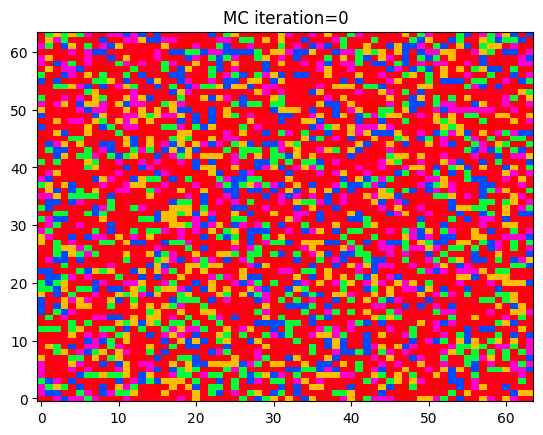

Starting MC simulation

MC step= 20  Energy= 0.457763671875  M= -0.08447265625
[[-1 -1  5 ... -1 -1 -1]
 [-1 -1  3 ... -1 -1  5]
 [-1  6 -1 ...  6  0 -1]
 ...
 [-1 -1 -1 ... -1  4  6]
 [-1 -1  1 ... -1 -1 -1]
 [-1 -1  3 ...  4 -1 -1]]


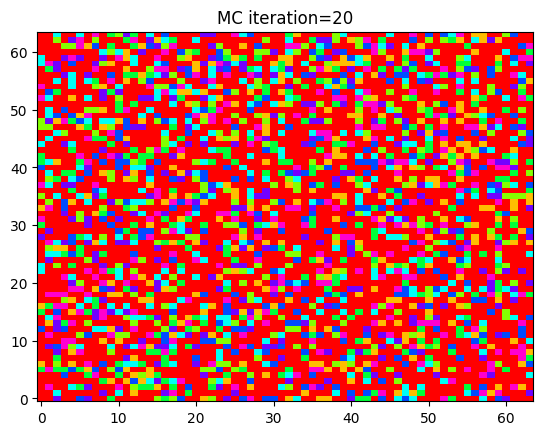


MC step= 40  Energy= 0.4619140625  M= -0.076171875
[[-1  2  1 ... -1  1 -1]
 [-1 -1 -1 ...  4 -1  1]
 [ 4 -1 -1 ...  0 -1  1]
 ...
 [-1 -1  2 ... -1 -1  0]
 [-1  1  0 ... -1 -1 -1]
 [-1 -1 -1 ...  1 -1 -1]]


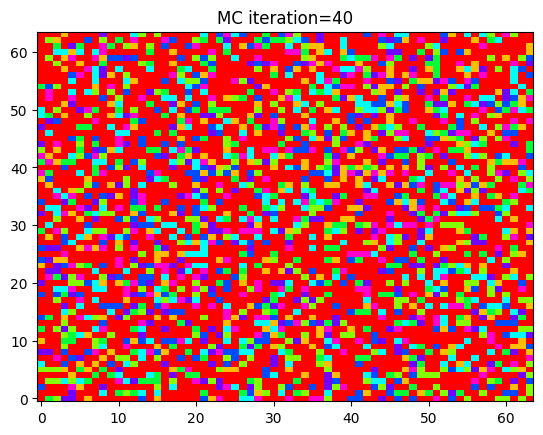


MC step= 60  Energy= 0.455810546875  M= -0.08837890625
[[-1 -1  0 ... -1 -1 -1]
 [-1  6  4 ... -1  4  1]
 [ 3  5 -1 ... -1  2  4]
 ...
 [ 6  4 -1 ...  3  2 -1]
 [-1 -1  1 ... -1  2 -1]
 [-1 -1  5 ... -1 -1 -1]]


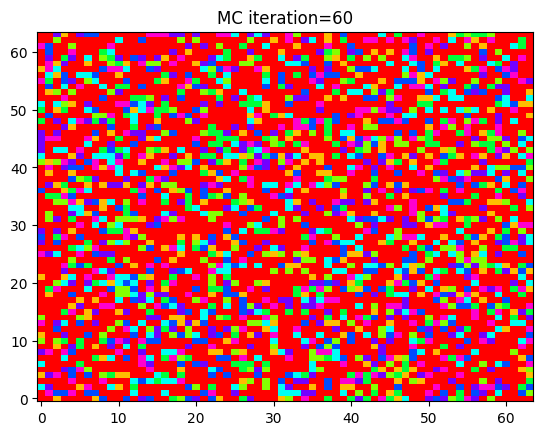


MC step= 80  Energy= 0.4765625  M= -0.046875
[[-1  4 -1 ...  5 -1  2]
 [-1  0 -1 ...  1  0 -1]
 [-1 -1  5 ...  6 -1 -1]
 ...
 [-1  2  3 ...  0  6 -1]
 [ 6 -1 -1 ... -1 -1  4]
 [-1 -1  1 ... -1  1  3]]


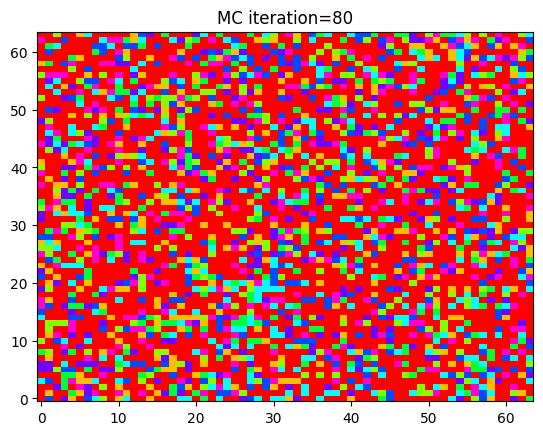


MC step= 100  Energy= 0.451171875  M= -0.09765625
[[ 1  5  5 ... -1 -1  3]
 [-1  2  3 ... -1  4  6]
 [ 4 -1  2 ... -1 -1 -1]
 ...
 [ 0 -1  0 ... -1 -1 -1]
 [ 6  6 -1 ... -1 -1 -1]
 [ 1  5  3 ... -1  4 -1]]


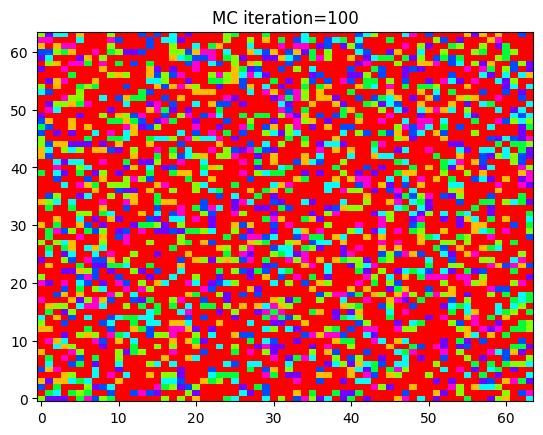


Simulation finished after 100 MC steps


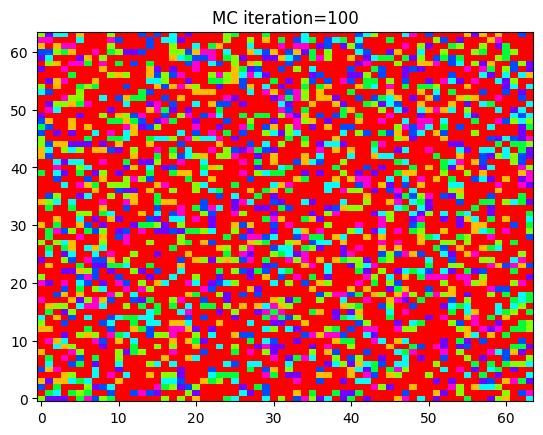

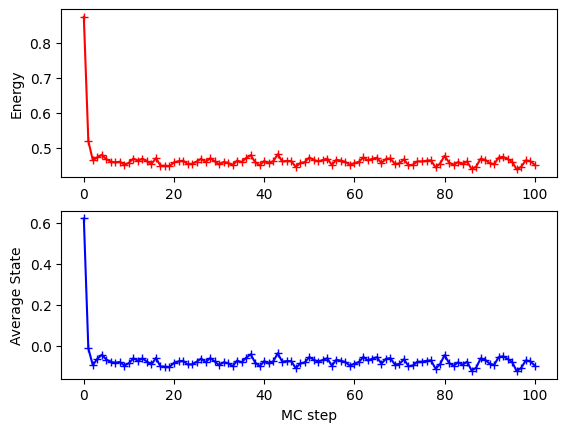

In [54]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

####################################################
def mcmove(config, N, p, n):
        a=np.random.randint(0,N, size=(N*N))
        b=np.random.randint(0,N, size=(N*N))
        for i in range(len(a)):
            if config[a[i],b[i]]>=0:
                config[a[i],b[i]]=-1
            elif rand() < p:#Com hi han dos estats, la probabilitat de transició és p+(1-p)*p. El que he esscrit es equivalent
                config[a[i],b[i]]=np.random.randint(0,n)# si hi ha una transició randomitza entre 0 i 1 que es com he codificat els dos estats diiferents.
        return config
###################################################El fet de asociar el segon estat com a zero només canvia la gràfica, tot lo demés es equivalent a canviar la probabilitat.


def configPlot(f, config, i, N, n):
        ''' This modules plts the configuration '''
        X, Y = np.meshgrid(range(N), range(N))
        ####################################### he canviat vmax perque soporti els estats extra i canviat el cmap a hsv per la major diversitat de colors (groundstate es vermell)
        plt.pcolormesh(X, Y, config, vmin=-1.0, vmax=n, cmap='hsv');
        ############################################
        plt.title('MC iteration=%d'%i);
        plt.axis('tight')
        plt.pause(0.1)


#################################################Els canvis fets aquí simplement conten el 0 com un 1 i uso un format de loop més ràpid
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = np.sum([1 if i>=0 else 0 for i in config.flatten()])
    return energy


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum([1 if i>=0 else i for i in config.flatten()])
    return mag
################################################
#
# MAIN PROGRAM
#
N = 64
print("MC Simulation two State system")
print("------------------------------")
print("Epsilon = Energy exited state")
temp = float(input("\n Please enter kT/Epsilon (suggestion 0.5): "))
msrmnt = int(input("\n Enter number of Monte Carlo (Metropolis) iterations (suggestion 100):"))
n=int(input('\n Enter number of degenerate states'))

p=0
for m in range(1,n+1):
  p+=(1-p)*np.exp(-1/temp)
step=[]
M=[]
E=[]

############################## Els estats inicials inclouen 0.
config = 2*np.random.randint(-1,n, size=(N,N))
##############################


Ene = calcEnergy(config)/(N*N)
Mag = calcMag(config)/(N*N)
t=0
print('MC step=',t,' Energy=',Ene,' M=',Mag)
step.append(t)
E.append(Ene)
M.append(Mag)

print('Initial configuration:')
print(config)

f = plt.figure(dpi=100)
configPlot(f, config, 0, N, n)
plt.show()

print("Starting MC simulation")
plt.ion()

for i in range(msrmnt):
        mcmove(config, N, p, n)
        t+=1
        Ene = calcEnergy(config)/(N*N)
        Mag = calcMag(config)/(N*N)
        step.append(t)
        E.append(Ene)
        M.append(Mag)

        if t%20 == 0:
            print('\nMC step=',t,' Energy=',Ene,' M=',Mag)
            print(config)
            configPlot(f, config, t, N, n)

print('\nSimulation finished after',t, 'MC steps')

plt.ioff()

configPlot(f, config, t, N, n)
plt.show()

plt.subplot(2, 1, 1)
plt.plot(step, E, 'r+-')
plt.ylabel('Energy')

plt.subplot(2, 1, 2)
plt.plot(step, M, 'b+-')
plt.ylabel('Average State')
plt.xlabel('MC step')

plt.show()

In [52]:
config


array([[-1,  3,  5, ..., -1, -1,  5],
       [-1, -1,  0, ..., -1, -1, -1],
       [ 4,  5,  5, ..., -1, -1,  1],
       ...,
       [ 4,  1,  0, ..., -1,  4,  0],
       [ 1, -1, -1, ...,  1, -1,  5],
       [-1, -1, -1, ..., -1, -1, -1]])